    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
Shape: (375, 6)

Columns:
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Educ

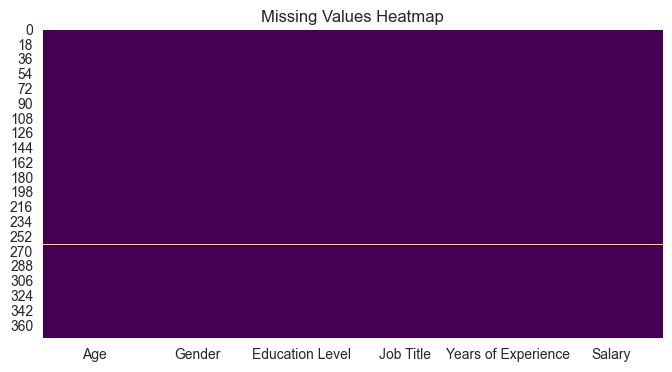

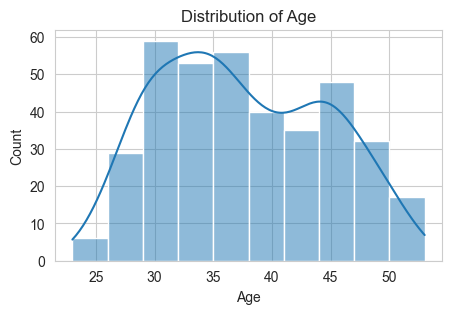

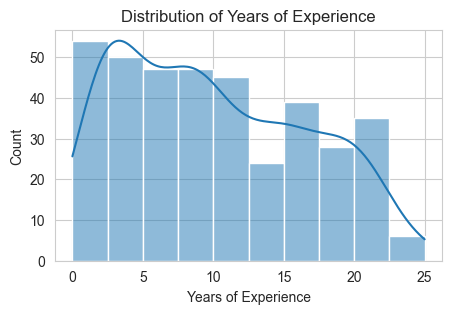

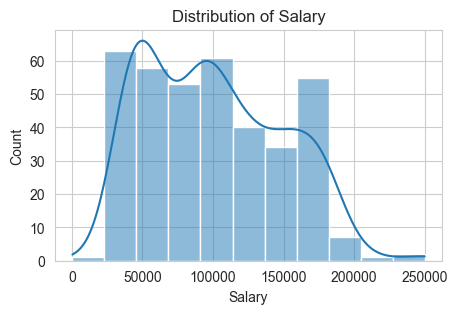

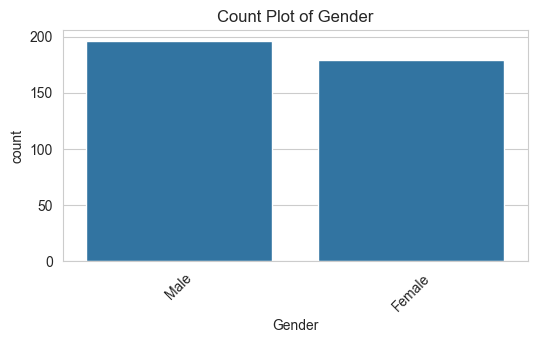

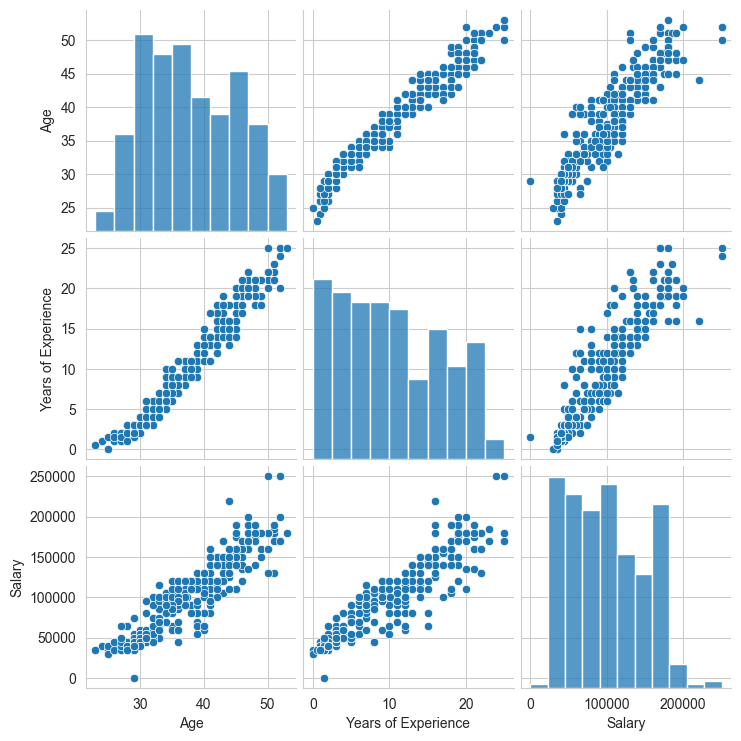

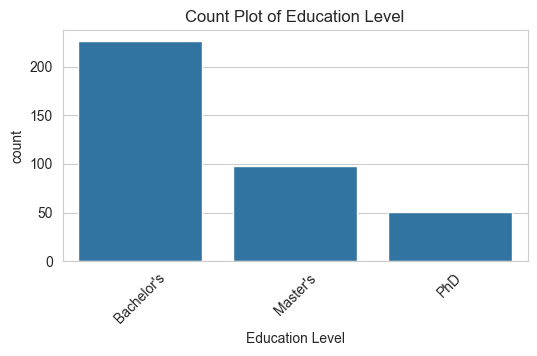

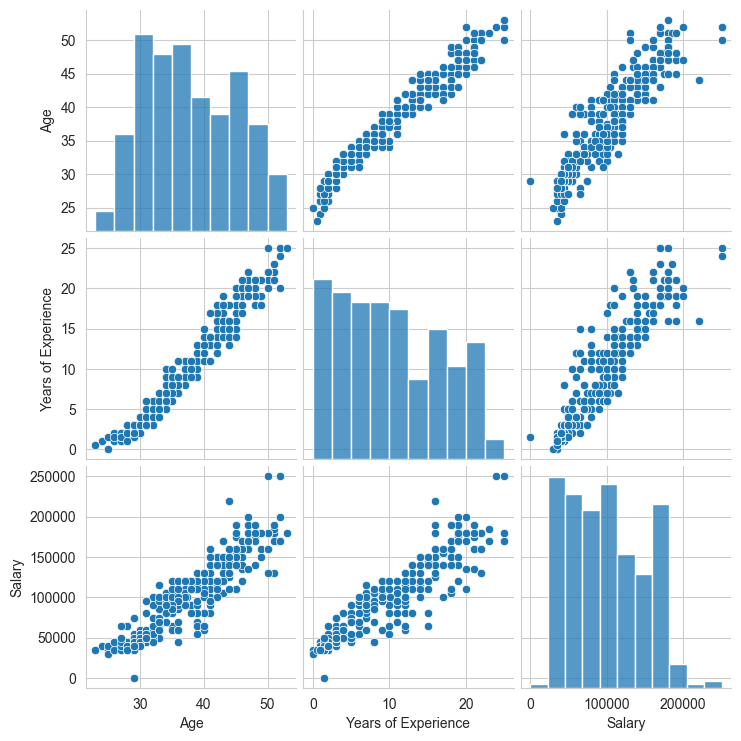

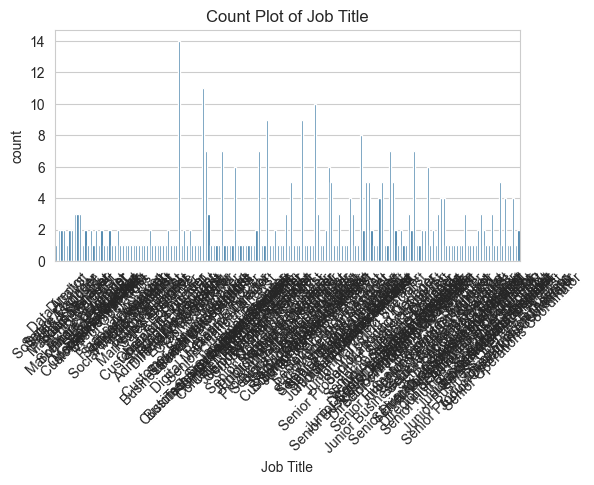

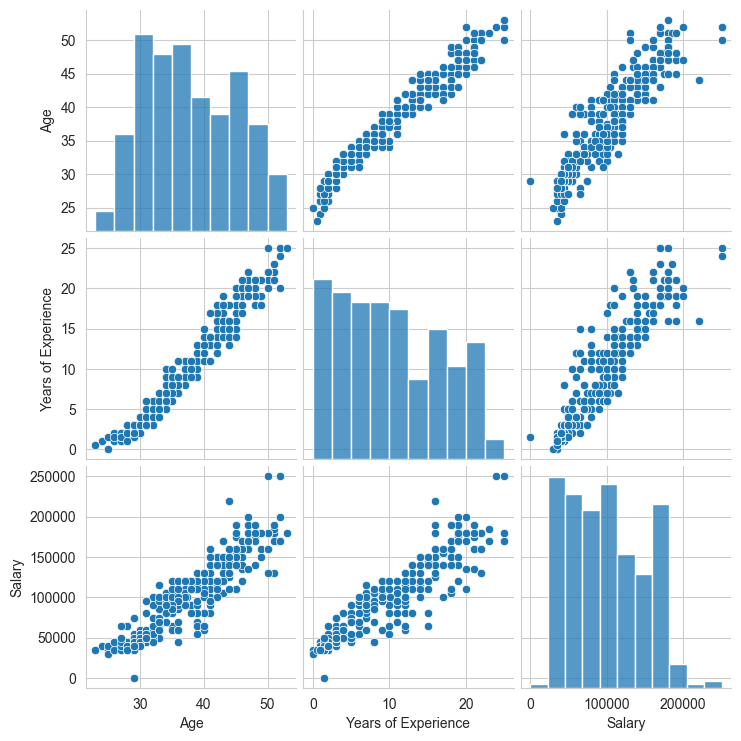

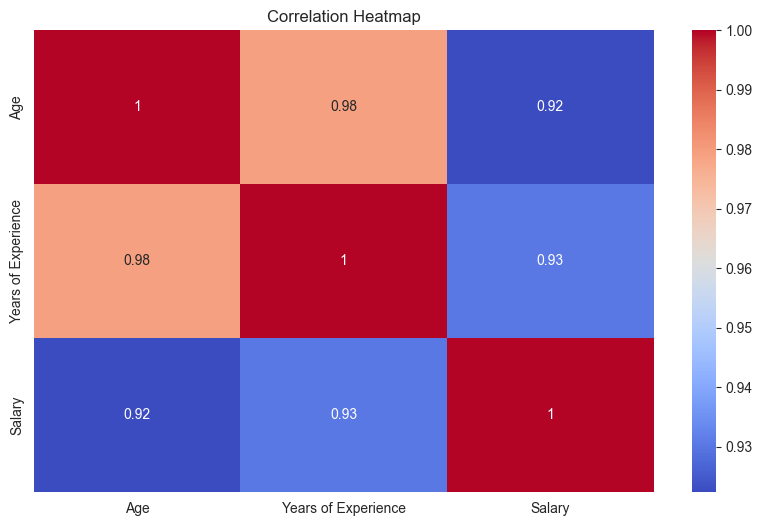

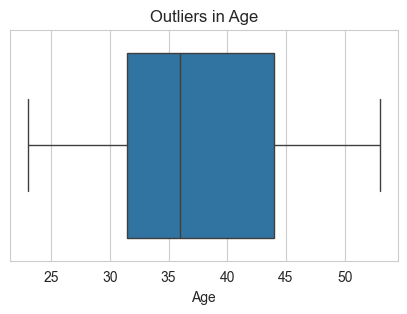

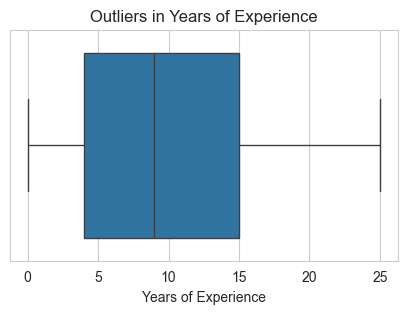

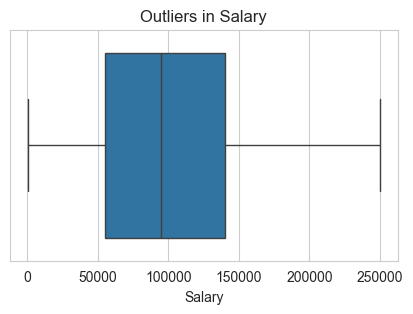

Cleaned dataset saved!
Duplicate rows: 50
Duplicate colums: 0
Age --> 32 unique values
Age
29.000000    20
33.000000    19
31.000000    18
36.000000    18
44.000000    15
35.000000    14
45.000000    14
34.000000    14
30.000000    14
47.000000    13
40.000000    12
37.000000    12
39.000000    12
38.000000    12
32.000000    12
28.000000    11
42.000000    11
43.000000    11
41.000000    10
27.000000     9
46.000000     9
48.000000     8
50.000000     7
26.000000     7
49.000000     7
51.000000     5
25.000000     4
52.000000     3
24.000000     1
23.000000     1
53.000000     1
37.431635     1
Name: count, dtype: int64
Gender --> 2 unique values
Age
29.000000    20
33.000000    19
31.000000    18
36.000000    18
44.000000    15
35.000000    14
45.000000    14
34.000000    14
30.000000    14
47.000000    13
40.000000    12
37.000000    12
39.000000    12
38.000000    12
32.000000    12
28.000000    11
42.000000    11
43.000000    11
41.000000    10
27.000000     9
46.000000     9
48.0

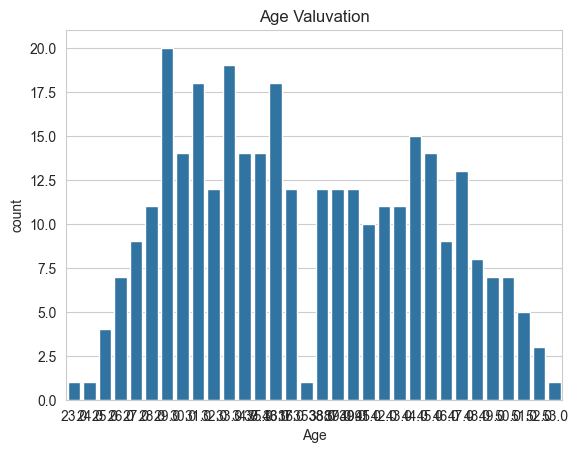

Gender
Male      171
Female    154
Name: count, dtype: int64


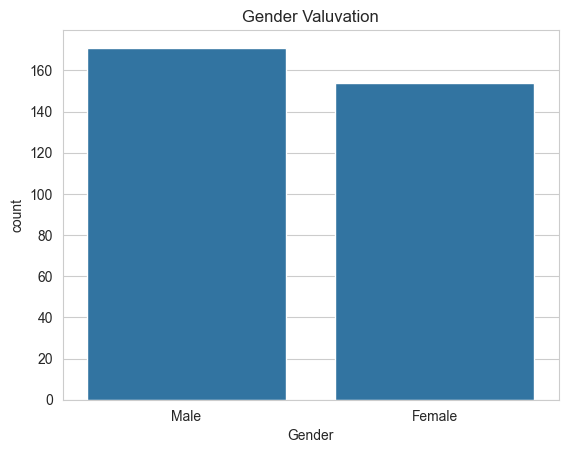

Education Level
Bachelor's    192
Master's       91
PhD            42
Name: count, dtype: int64


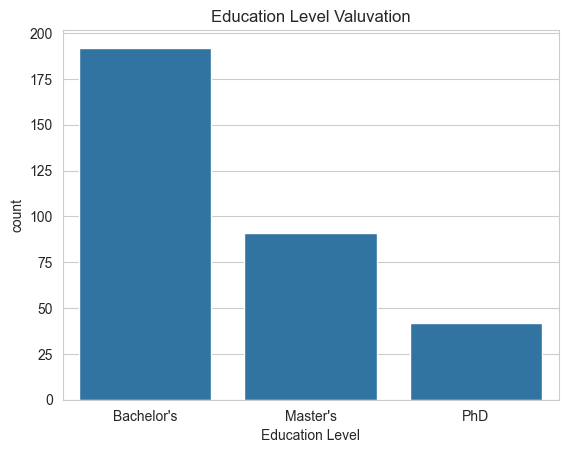

Job Title
Director of Operations            9
Director of Marketing             9
Senior Marketing Manager          8
Senior Project Manager            7
Senior Data Scientist             6
                                 ..
Junior Social Media Specialist    1
Junior Operations Coordinator     1
Senior HR Specialist              1
Director of HR                    1
Junior Financial Advisor          1
Name: count, Length: 174, dtype: int64


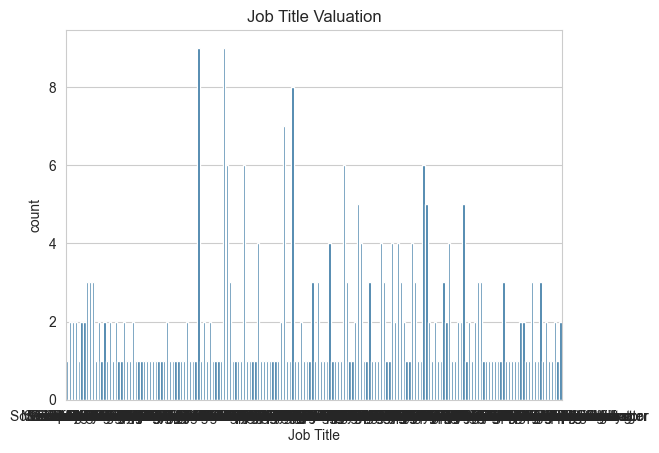

Years of Experience
3.000000     27
2.000000     26
9.000000     19
8.000000     17
5.000000     16
10.000000    16
7.000000     16
4.000000     16
16.000000    15
12.000000    14
19.000000    13
20.000000    13
15.000000    12
21.000000    11
14.000000    11
18.000000    11
6.000000     11
1.500000     11
13.000000    10
11.000000     9
22.000000     8
1.000000      7
17.000000     5
25.000000     3
0.000000      3
23.000000     2
24.000000     1
0.500000      1
10.030831     1
Name: count, dtype: int64


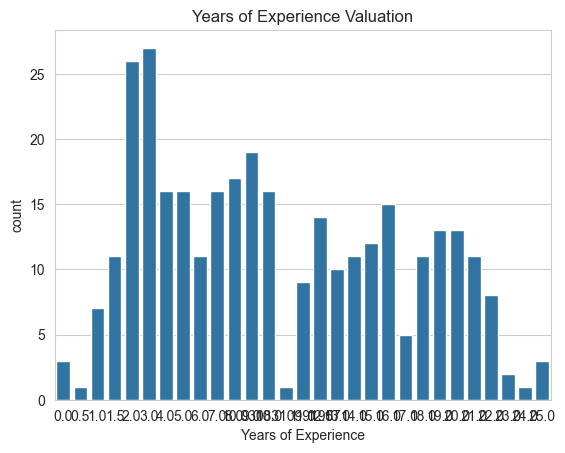

Salary
40000.000000     26
120000.000000    20
50000.000000     19
45000.000000     18
95000.000000     18
180000.000000    17
90000.000000     15
110000.000000    14
140000.000000    14
160000.000000    14
170000.000000    13
60000.000000     13
150000.000000    12
100000.000000    12
80000.000000     12
35000.000000     12
130000.000000    11
55000.000000     10
65000.000000      9
70000.000000      8
105000.000000     6
85000.000000      5
75000.000000      4
190000.000000     4
115000.000000     3
200000.000000     2
250000.000000     2
175000.000000     2
135000.000000     2
125000.000000     1
30000.000000      1
220000.000000     1
185000.000000     1
100577.345845     1
145000.000000     1
155000.000000     1
350.000000        1
Name: count, dtype: int64


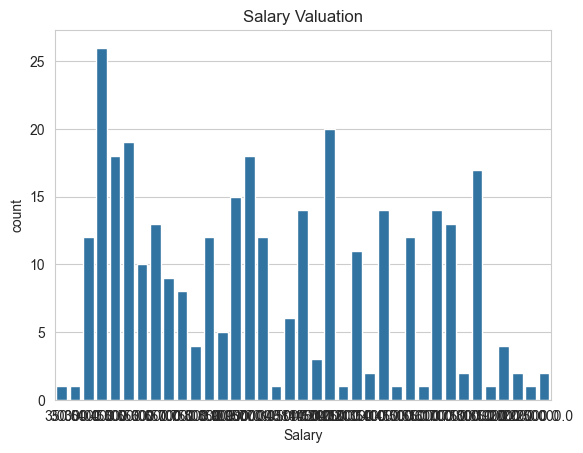

Skewness:
Age                    0.195437
Years of Experience    0.358958
Salary                 0.437611
dtype: float64


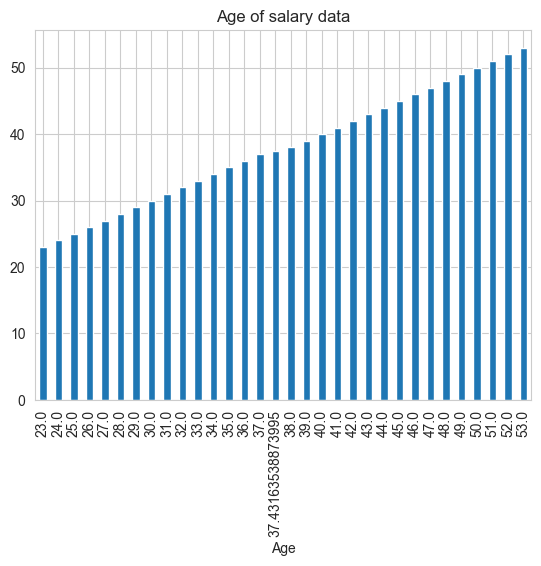

Highly correlated columns: ['Years of Experience', 'Salary']
Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')
(375, 5) (375,)


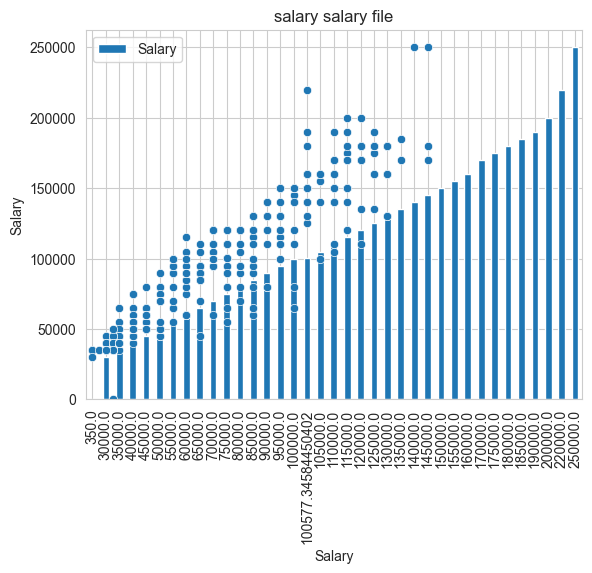

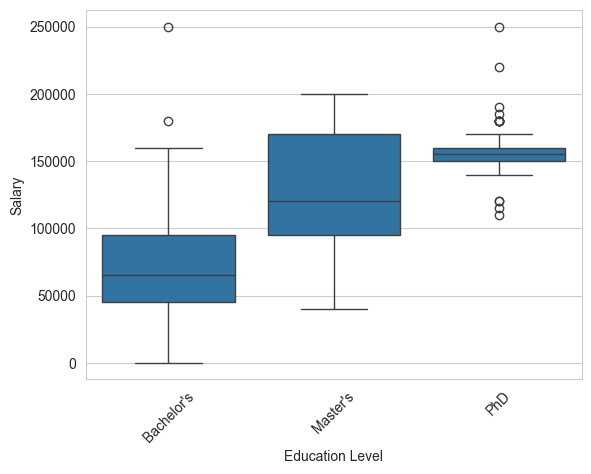

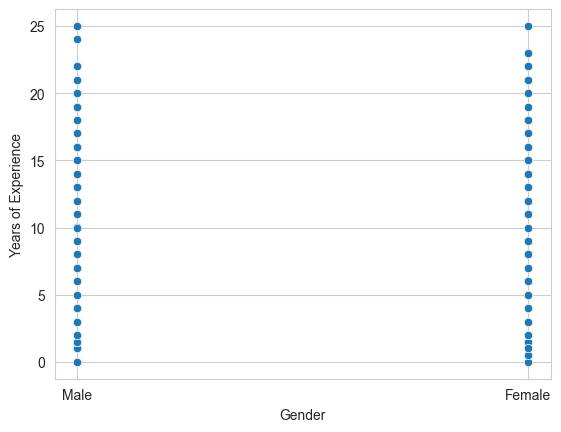

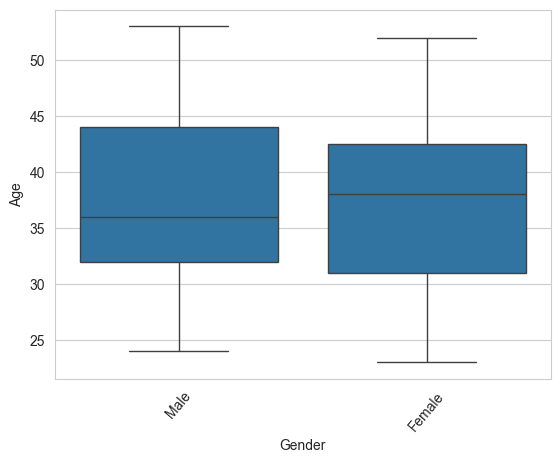

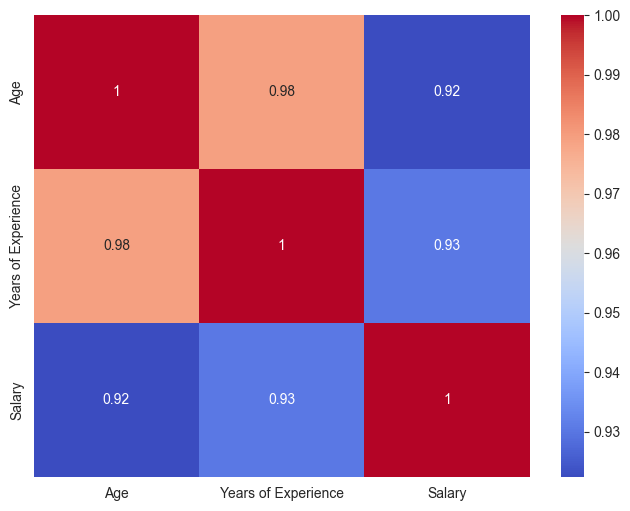

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 

df = pd.read_csv("salary data.csv")
print(df.head())

print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nInfo:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


df = df.fillna(df.mean(numeric_only=True))

for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])

    num_cols = df.select_dtypes(include=np.number).columns  



for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    cat_cols = df.select_dtypes(include="object").columns 

for col in cat_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Count Plot of {col}")
    plt.show()

    sns.pairplot(df) 
plt.show()

plt.figure(figsize=(10,6))       
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

for col in num_cols:             
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

    df.to_csv("salary data.csv", index=False)
print("Cleaned dataset saved!")



print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


print("Duplicate colums:", df.duplicated().sum())
df = df.drop_duplicates()

for col in df.columns:     
    print(f"{col} --> {df[col].nunique()} unique values")

    print(df["Age"].value_counts())   

sns.countplot(x=df["Age"])
plt.title("Age Valuvation")
plt.show()


print(df["Gender"].value_counts())   

sns.countplot(x=df["Gender"])
plt.title("Gender Valuvation")
plt.show()



print(df["Education Level"].value_counts())  
sns.countplot(x=df["Education Level"])
plt.title("Education Level Valuvation")
plt.show()




print(df["Job Title"].value_counts())   

sns.countplot(x=df["Job Title"])
plt.title("Job Title Valuation")
plt.show()




print(df["Years of Experience"].value_counts())    

sns.countplot(x=df["Years of Experience"])
plt.title("Years of Experience Valuation")
plt.show()





print(df["Salary"].value_counts())  
sns.countplot(x=df["Salary"])
plt.title("Salary Valuation")
plt.show()




print("Skewness:")
print(df.skew(numeric_only=True))
for col in num_cols:
    if abs(df[col].skew()) > 3:
        df[col] = np.log1p(df[col])        


df.groupby("Age")["Age"].mean()        
df.groupby("Age")["Age"].mean().plot(kind="bar")         
plt.title("Age of salary data")
plt.show()                                                



df.groupby("Salary")["Salary"].mean()        
df.groupby("Salary")["Salary"].mean().plot(kind="bar")         
plt.title("salary salary file")

corr_matrix = df.corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Highly correlated columns:", high_corr)

df = df.drop(columns=high_corr)            

import pandas as pd
df = pd.read_csv("salary data.csv")
print(df.columns)

X = df.drop("Education Level", axis=1)
y = df["Education Level"]

print(X.shape, y.shape)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 


sns.scatterplot(x="Years of Experience", y="Salary", data=df)
plt.show()                                                   

sns.boxplot(x="Education Level", y="Salary", data=df)
plt.xticks(rotation=45)
plt.show()                                                 



sns.set_style("whitegrid") 


sns.scatterplot(x="Gender", y="Years of Experience", data=df)
plt.show()                                                   


sns.boxplot(x="Gender", y="Age", data=df)
plt.xticks(rotation=50)
plt.show()                                                 

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()                              
